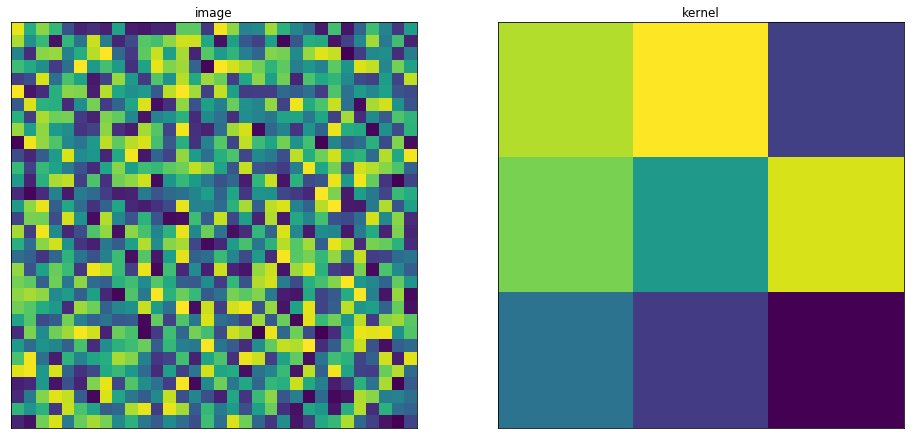

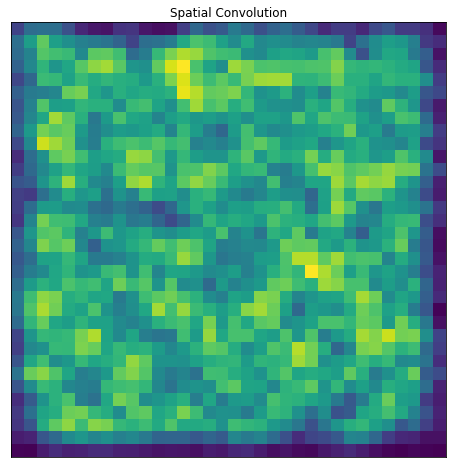

In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

from skimage import io
from scipy import signal
from scipy import fftpack

###########################################################################################
# Adapted from: <https://pythonexample.com/snippet/convolution-theorempy_binary10_python> #
###########################################################################################

# Initialize a image and kernel.
signal = np.random.randint(0, 255, (32, 32))
kernel = np.random.randint(0, 255, ( 3,  3))

# Convolve image with kernel.
conv = scipy.signal.convolve2d(signal, kernel)

###########################################################################################
# Plotting. ###############################################################################
###########################################################################################
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

ax1.imshow(signal)
ax1.set_title('image')
ax1.set_xticks([])
ax1.set_yticks([])
ax2.imshow(kernel)
ax2.set_title('kernel')
ax2.set_xticks([])
ax2.set_yticks([])

plt.show()

# Plotting.
f, ax1 = plt.subplots(1, 1, figsize=(8, 8))

ax1.imshow(conv)
ax1.set_title('Spatial Convolution')
ax1.set_xticks([])
ax1.set_yticks([])

plt.show()

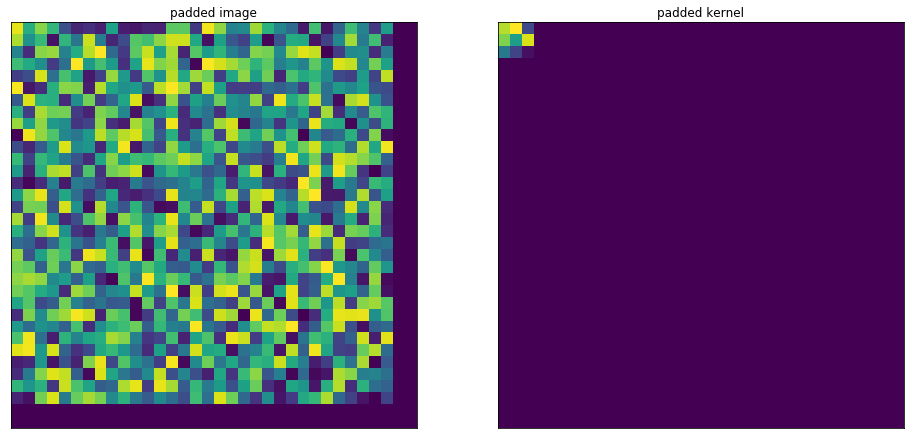

In [2]:
# Copy and pad image and kernel.
signal_pad = np.zeros(conv.shape, dtype=np.float)
signal_pad[0:signal.shape[0], 0:signal.shape[1]] = signal

kernel_pad = np.zeros(conv.shape, dtype=np.float)
kernel_pad[0:kernel.shape[0], 0:kernel.shape[1]] = kernel

###########################################################################################
# Plotting. ###############################################################################
###########################################################################################
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

ax1.imshow(signal_pad)
ax1.set_title('padded image')
ax1.set_xticks([])
ax1.set_yticks([])
ax2.imshow(kernel_pad)
ax2.set_title('padded kernel')
ax2.set_xticks([])
ax2.set_yticks([])

plt.show()

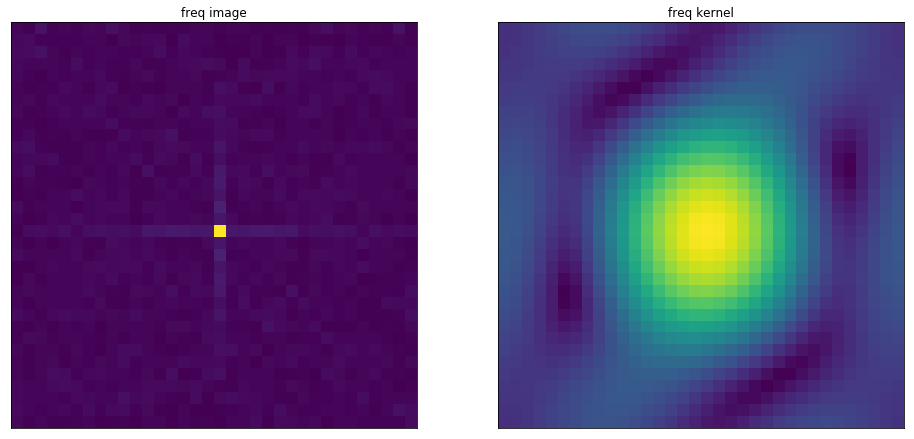

In [3]:
# Compute FFT of image and kernel.
f_signal = fftpack.fft2(signal_pad)
f_kernel = fftpack.fft2(kernel_pad)

###########################################################################################
# Plotting. ###############################################################################
###########################################################################################
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# ax1.imshow(np.abs(f_signal))
ax1.imshow(np.abs(np.fft.fftshift(f_signal)))
ax1.set_title('freq image')
ax1.set_xticks([])
ax1.set_yticks([])
# ax2.imshow(np.abs(f_kernel))
ax2.imshow(np.abs(np.fft.fftshift(f_kernel)))
ax2.set_title('freq kernel')
ax2.set_xticks([])
ax2.set_yticks([])

plt.show()

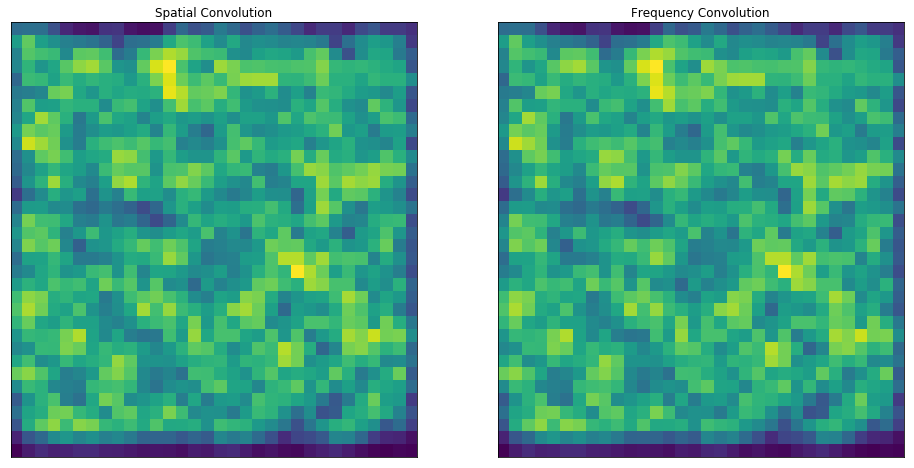

In [4]:
# Inverse FFT of convolved image.
f_conv = np.real(fftpack.ifft2(f_signal * f_kernel))

###########################################################################################
# Plotting. ###############################################################################
###########################################################################################
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharey=True)

ax1.imshow(conv)
ax1.set_title('Spatial Convolution')
ax1.set_xticks([])
ax1.set_yticks([])
ax2.imshow(f_conv)
ax2.set_title('Frequency Convolution')
ax2.set_xticks([])
ax2.set_yticks([])

plt.show()

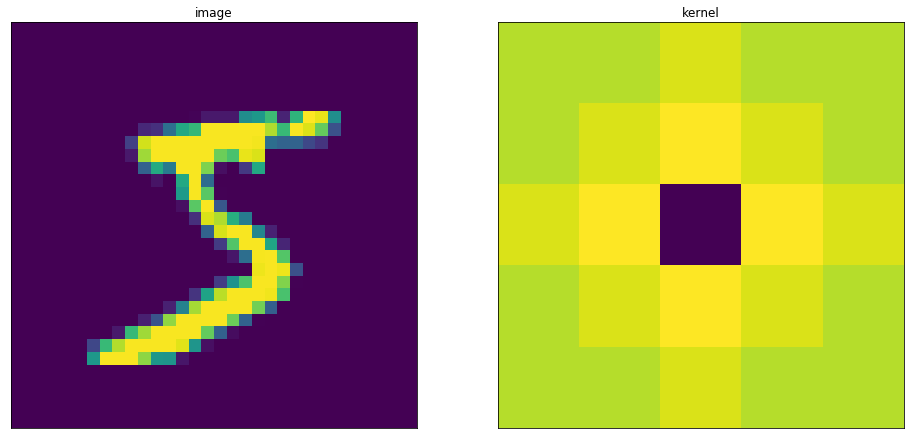

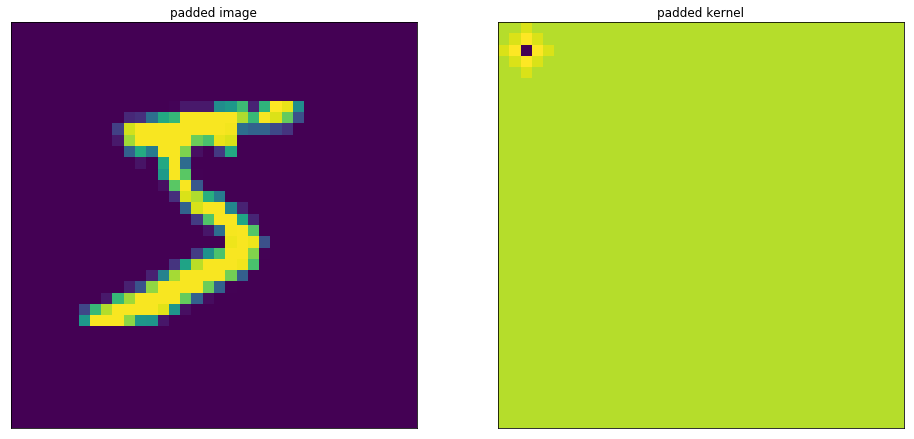

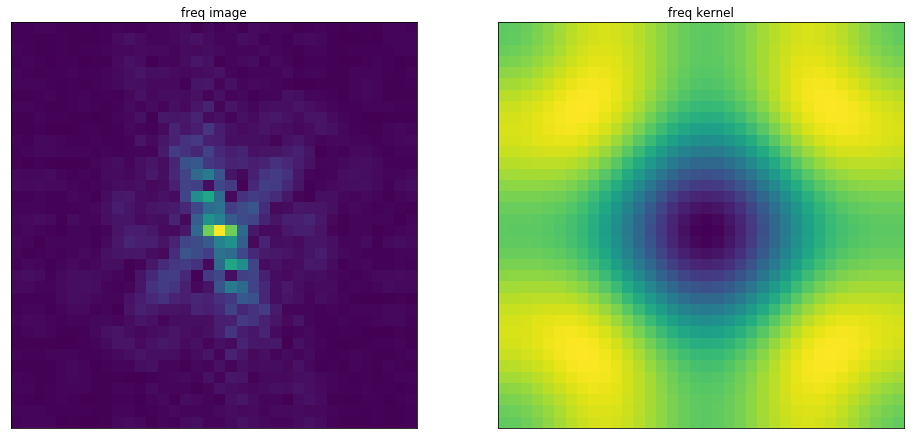

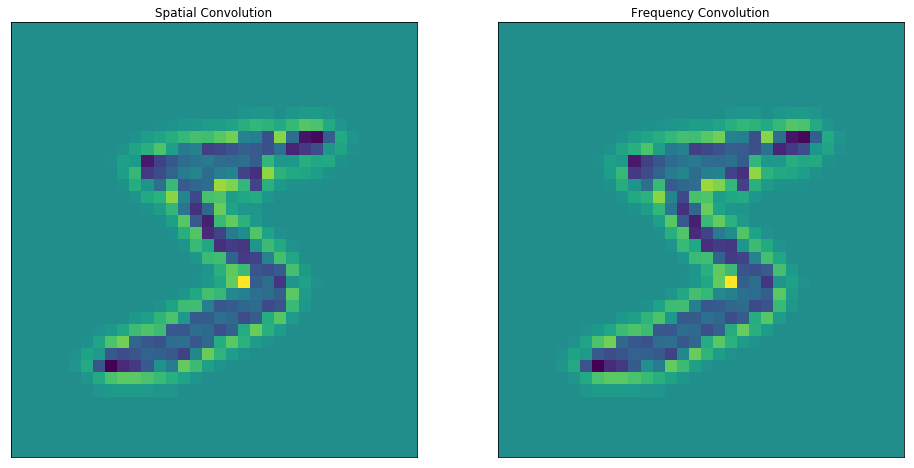

In [7]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

from skimage import io
from scipy import signal
from scipy import fftpack

###########################################################################################
# Adapted from: <https://pythonexample.com/snippet/convolution-theorempy_binary10_python> #
###########################################################################################

# Reading image and initiating kernel.
signal = io.imread('images/mnist_sample_5.png')
# kernel = np.asarray([[1.0/3, 1.0/3, 1.0/3], [1.0/3, 1.0/3, 1.0/3], [1.0/3, 1.0/3, 1.0/3]], dtype=np.float) # Mean.
# kernel = np.asarray([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.float) # Sobel.
# kernel = np.asarray([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]], dtype=np.float) # Prewitt.
# kernel = np.asarray([[1, 1, 1], [1, -8, 1], [1, 1, 1]], dtype=np.float) # Approximate 3x3 Laplacian.
kernel = np.asarray([[0, 0, 1, 0, 0], [0, 1, 2, 1, 0], [1, 2, -16, 2, 1], [0, 1, 2, 1, 0], [0, 0, 1, 0, 0]], dtype=np.float) # Approximate 5x5 Laplacian.

if len(signal.shape) > 2:
    
    signal = signal[:, :, 1]

# Convolve image with kernel.
conv = scipy.signal.convolve2d(signal, kernel)

# Copy and pad image and kernel.
signal_pad = np.zeros(conv.shape, dtype=np.float)
signal_pad[0:signal.shape[0], 0:signal.shape[1]] = signal

kernel_pad = np.zeros(conv.shape, dtype=np.float)
kernel_pad[0:kernel.shape[0], 0:kernel.shape[1]] = kernel

# Compute FFT of image and kernel.
f_signal = fftpack.fft2(signal_pad)
f_kernel = fftpack.fft2(kernel_pad)

# Inverse FFT of frequency image.
f_conv = np.real(fftpack.ifft2(f_signal * f_kernel))

# Plotting.
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

ax1.imshow(signal)
ax1.set_title('image')
ax1.set_xticks([])
ax1.set_yticks([])
ax2.imshow(kernel)
ax2.set_title('kernel')
ax2.set_xticks([])
ax2.set_yticks([])

plt.show()

# Plotting.
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

ax1.imshow(signal_pad)
ax1.set_title('padded image')
ax1.set_xticks([])
ax1.set_yticks([])
ax2.imshow(kernel_pad)
ax2.set_title('padded kernel')
ax2.set_xticks([])
ax2.set_yticks([])

plt.show()

# Plotting.
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

ax1.imshow(np.abs(np.fft.fftshift(f_signal)))
ax1.set_title('freq image')
ax1.set_xticks([])
ax1.set_yticks([])
ax2.imshow(np.abs(np.fft.fftshift(f_kernel)))
ax2.set_title('freq kernel')
ax2.set_xticks([])
ax2.set_yticks([])

plt.show()

# Plotting.
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharey=True)

ax1.imshow(conv)
ax1.set_title('Spatial Convolution')
ax1.set_xticks([])
ax1.set_yticks([])
ax2.imshow(f_conv)
ax2.set_title('Frequency Convolution')
ax2.set_xticks([])
ax2.set_yticks([])

plt.show()